<a href="https://colab.research.google.com/github/Equal0ucH/Data_Pear_apple/blob/main/ProjetElec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir -p /content/Dataset_Combined/Training/Pomme /content/Dataset_Combined/Training/Poire /content/Dataset_Combined/Test/Pomme /content/Dataset_Combined/Test/Poire


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import os
import shutil


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Dataset_Combined/Training',
    target_size=(240, 320),
    batch_size=128,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Dataset_Combined/Test',
    target_size=(240, 320),
    batch_size=128,
    class_mode='binary'
)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [5]:
model = Sequential([
    Conv2D(16, (2, 2), activation='relu', input_shape=(240, 320,3)),

    MaxPooling2D(2, 2),

    Conv2D(32, (2, 2), activation='relu'),

    MaxPooling2D(2, 2),

    Conv2D(64, (2, 2), activation='relu'),

    MaxPooling2D(2, 2),

    Conv2D(128, (2, 2), activation='relu'),

    MaxPooling2D(2, 2),

    Conv2D(256, (2, 2), activation='relu'),

    MaxPooling2D(2, 2),

    Dropout(0.3),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 239, 319, 16)        │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 119, 159, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 118, 158, 32)        │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 59, 79, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 58, 78, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 29, 39, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 38, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 18, 256)         │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 13824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │       2,073,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,248,669 (8.58 MB)

 Trainable params: 2,248,669 (8.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Augmenter le nombre d'époques
)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5653 - loss: 0.7192
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.6946 - loss: 0.5804
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8687 - loss: 0.3988
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 302ms/step - accuracy: 0.8768 - loss: 0.3465
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.9277 - loss: 0.2328
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 377ms/step - accuracy: 0.9268 - loss: 0.2048
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - accuracy: 0.9445 - loss: 0.1713
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.9414 - loss: 0.1984
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.9603 - loss: 0.1518
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 307ms/step - accuracy: 0.9674 - loss: 0.1156
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - accuracy: 0.9704 - loss: 0.1225
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step - accuracy: 0.9671 - loss

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - accuracy: 1.0000 - loss: 0.0561
Test Accuracy: 100.00%


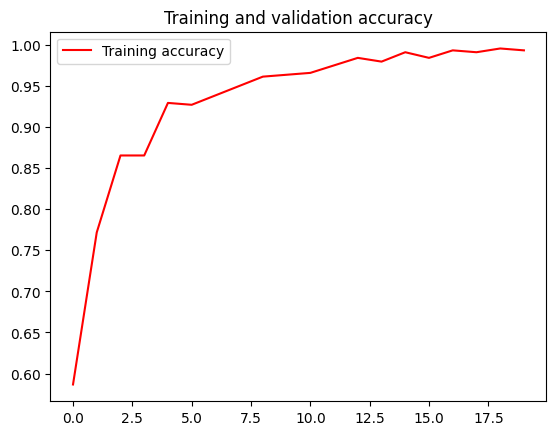

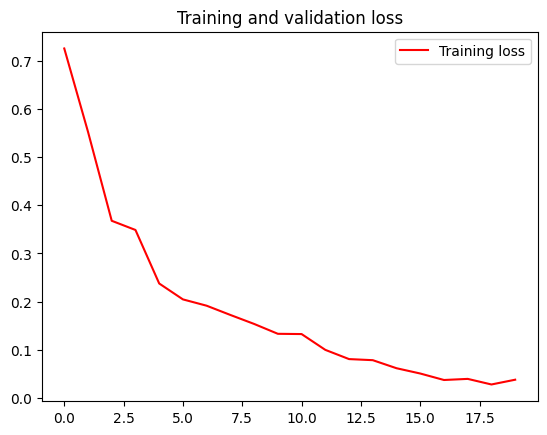

In [ ]:
# Enregistrer le modèle TensorFlow
model.save('fruit_classifier_model.h5')

acc = history.history['accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
[[0.36578947]]
Image: /content/Dataset_Combined/Test/image_luminance_14.png
Prédiction: Poire
Confiance: 0.6342


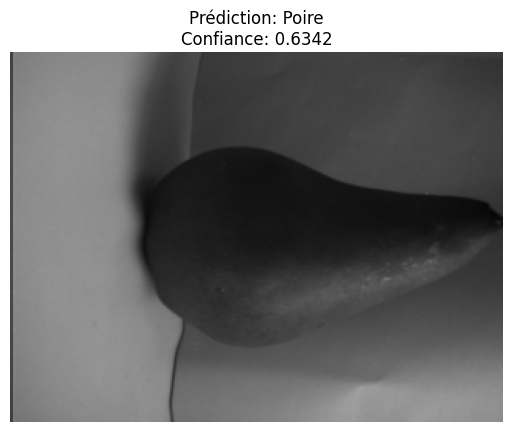

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[8.371976e-05]]
Image: /content/Dataset_Combined/Test/image_luminance_18.png
Prédiction: Poire
Confiance: 0.9999


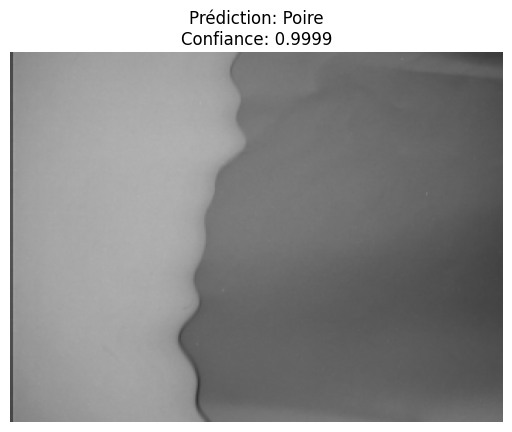

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.02617663]]
Image: /content/Dataset_Combined/Test/image_luminance_15.png
Prédiction: Poire
Confiance: 0.9738


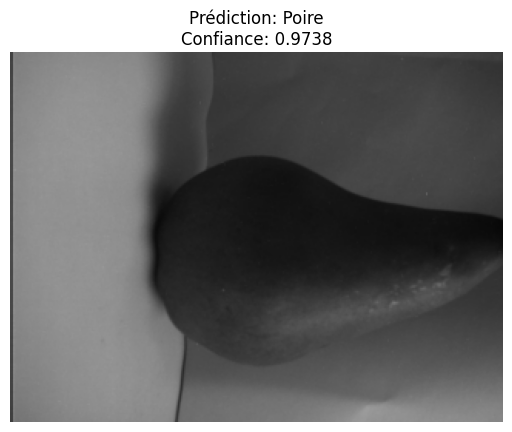

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.999949]]
Image: /content/Dataset_Combined/Test/image_luminance_4.png
Prédiction: Pomme
Confiance: 0.9999


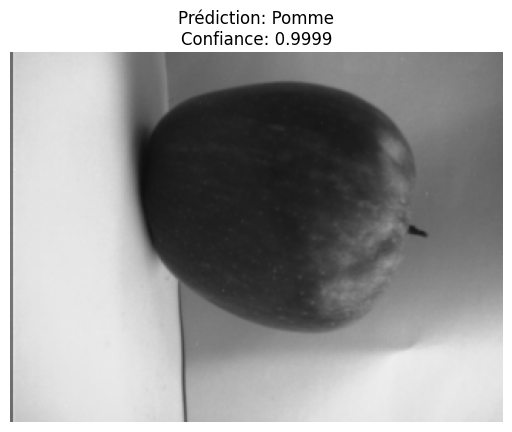

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.03402635]]
Image: /content/Dataset_Combined/Test/image_luminance_17.png
Prédiction: Poire
Confiance: 0.9660


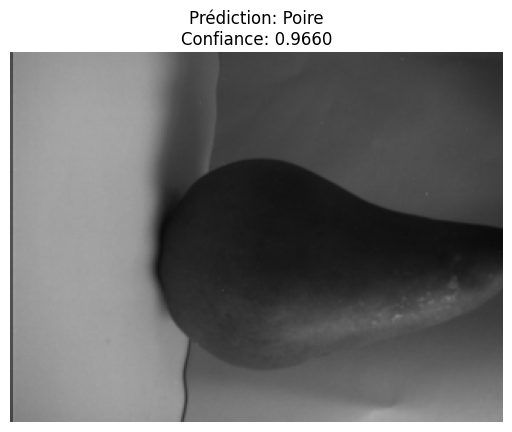

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9999949]]
Image: /content/Dataset_Combined/Test/image_luminance_23.png
Prédiction: Pomme
Confiance: 1.0000


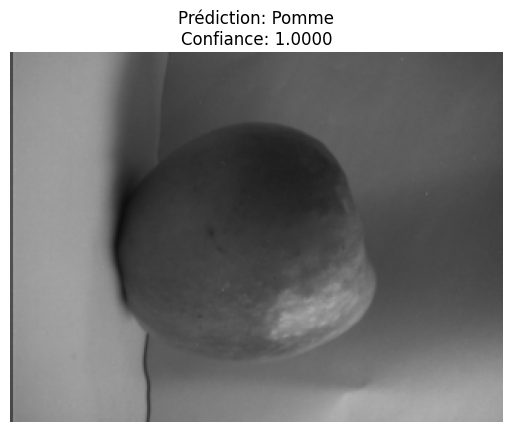

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9999943]]
Image: /content/Dataset_Combined/Test/image_luminance_24.png
Prédiction: Pomme
Confiance: 1.0000


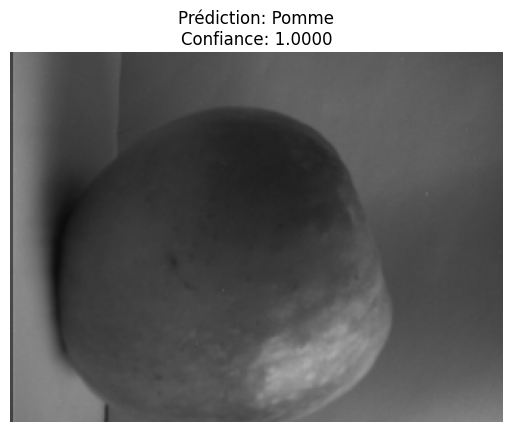

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.00471805]]
Image: /content/Dataset_Combined/Test/image_luminance_1.png
Prédiction: Poire
Confiance: 0.9953


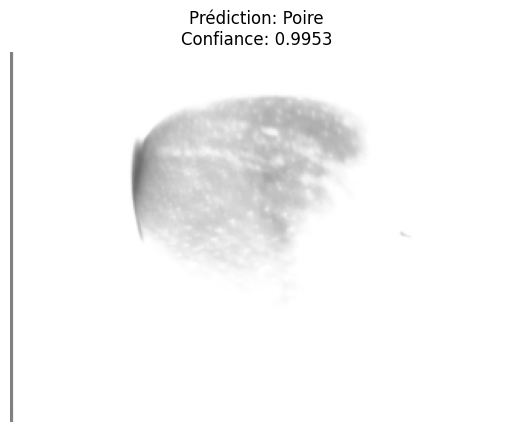

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9999851]]
Image: /content/Dataset_Combined/Test/image_luminance_22.png
Prédiction: Pomme
Confiance: 1.0000


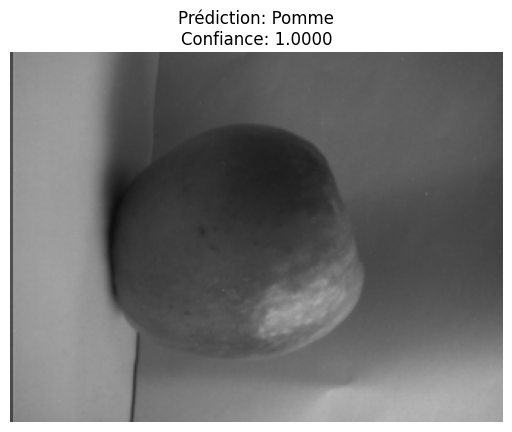

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.08230023]]
Image: /content/Dataset_Combined/Test/image_luminance_12.png
Prédiction: Poire
Confiance: 0.9177


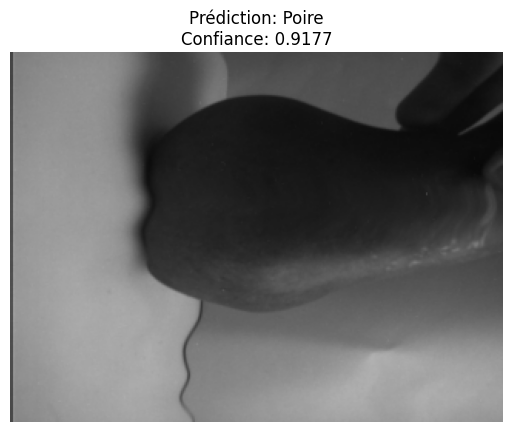

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9995284]]
Image: /content/Dataset_Combined/Test/image_luminance_7.png
Prédiction: Pomme
Confiance: 0.9995


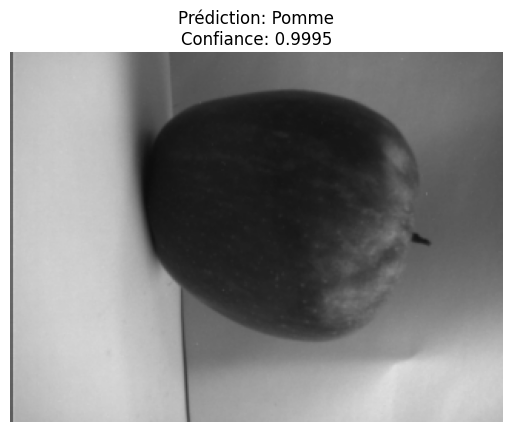

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0.52828693]]
Image: /content/Dataset_Combined/Test/image_luminance_13.png
Prédiction: Pomme
Confiance: 0.5283


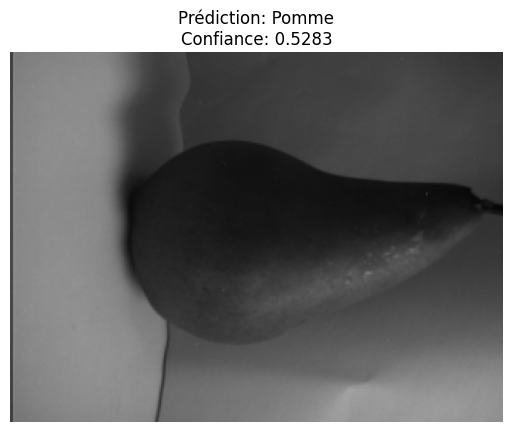

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.99856514]]
Image: /content/Dataset_Combined/Test/image_luminance_10.png
Prédiction: Pomme
Confiance: 0.9986


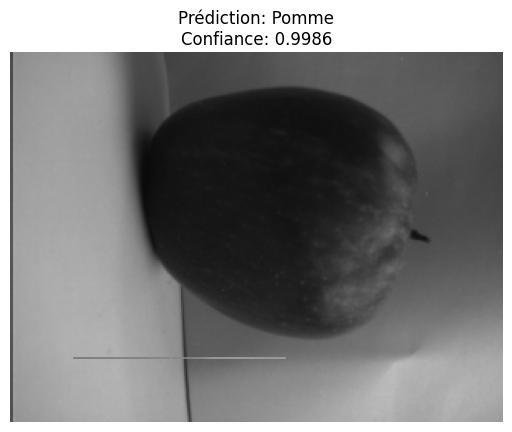

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9999031]]
Image: /content/Dataset_Combined/Test/image_luminance_21.png
Prédiction: Pomme
Confiance: 0.9999


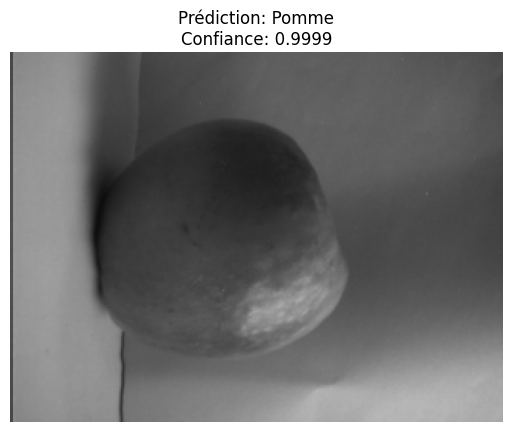

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9980305]]
Image: /content/Dataset_Combined/Test/image_luminance_9.png
Prédiction: Pomme
Confiance: 0.9980


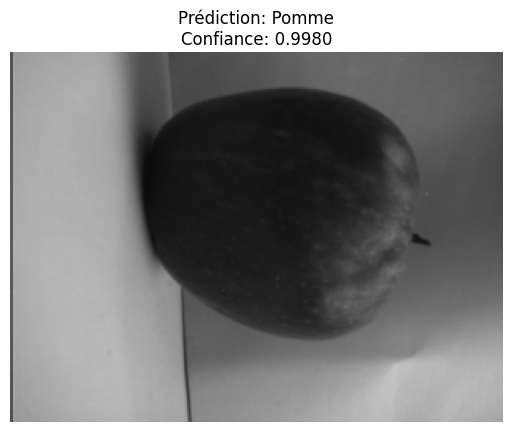

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.03620625]]
Image: /content/Dataset_Combined/Test/image_luminance_16.png
Prédiction: Poire
Confiance: 0.9638


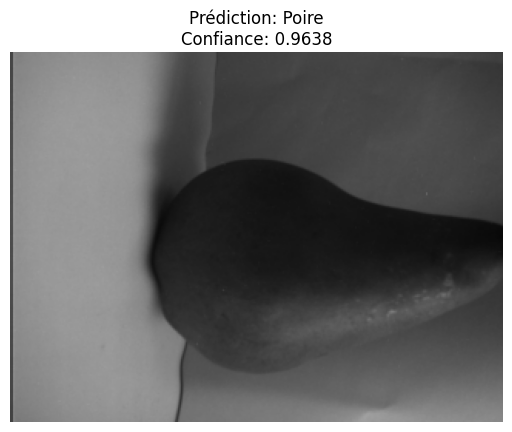

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.99964774]]
Image: /content/Dataset_Combined/Test/image_luminance_6.png
Prédiction: Pomme
Confiance: 0.9996


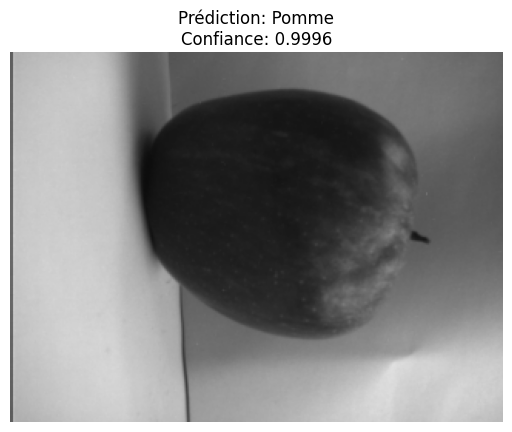

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.99980396]]
Image: /content/Dataset_Combined/Test/image_luminance_5.png
Prédiction: Pomme
Confiance: 0.9998


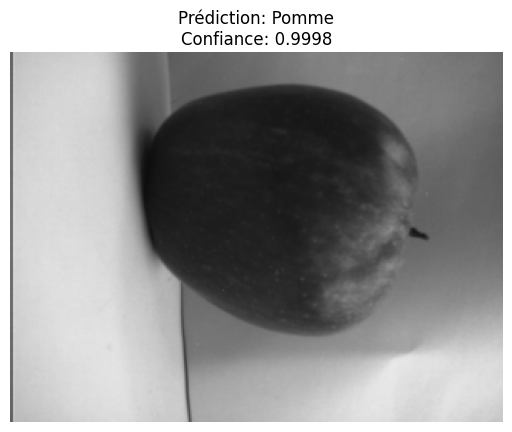

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.00801794]]
Image: /content/Dataset_Combined/Test/image_luminance_11.png
Prédiction: Poire
Confiance: 0.9920


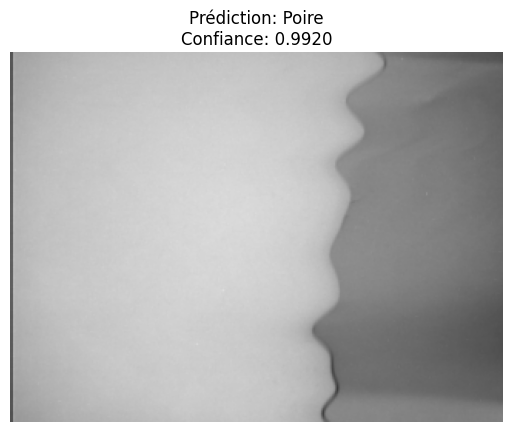

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[0.9988625]]
Image: /content/Dataset_Combined/Test/image_luminance_8.png
Prédiction: Pomme
Confiance: 0.9989


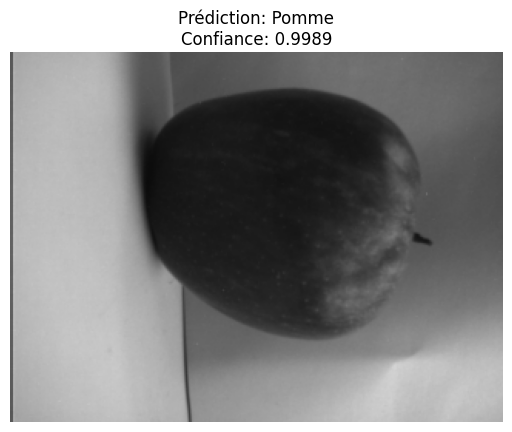

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.99984276]]
Image: /content/Dataset_Combined/Test/image_luminance_20.png
Prédiction: Pomme
Confiance: 0.9998


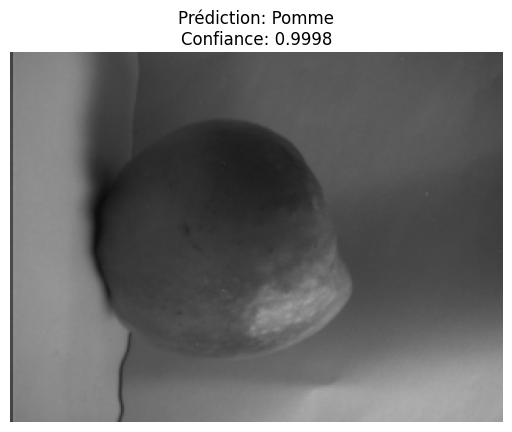

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.9988877]]
Image: /content/Dataset_Combined/Test/image_luminance_2.png
Prédiction: Pomme
Confiance: 0.9989


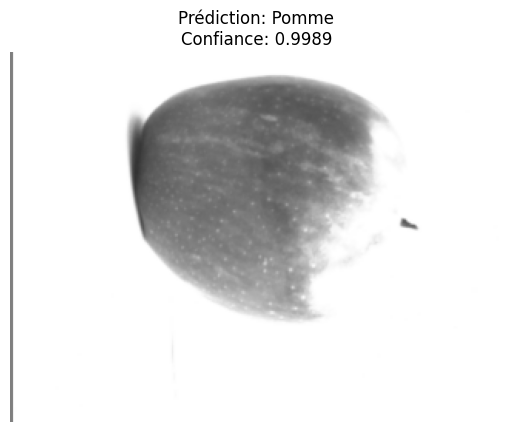

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.96534115]]
Image: /content/Dataset_Combined/Test/image_luminance_19.png
Prédiction: Pomme
Confiance: 0.9653


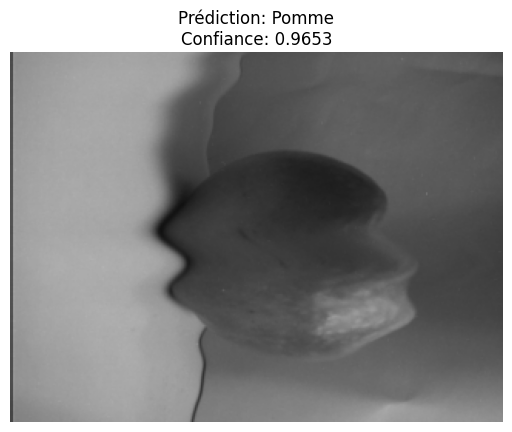

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.]]
Image: /content/Dataset_Combined/Test/image_luminance_3.png
Prédiction: Pomme
Confiance: 1.0000


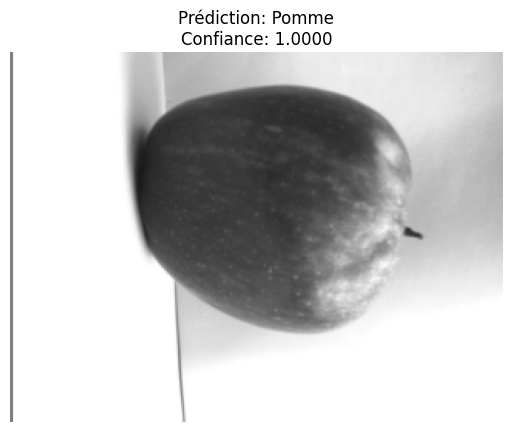

In [ ]:
model = load_model('/content/fruit_classifier_model.h5')
# Fonction pour tester une image et afficher la prédiction
def test_single_image(image_path, model):
    img = load_img(image_path, target_size=(240, 320))  # Assurez-vous que la taille est cohérente

    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    print (prediction)
    predicted_class = 'Poire' if prediction[0][0] < 0.5 else 'Pomme'
    confidence = max(prediction[0][0], 1 - prediction[0][0])

    print(f"Image: {image_path}")
    print(f"Prédiction: {predicted_class}")
    print(f"Confiance: {confidence:.4f}")
    plt.imshow(img)
    plt.title(f"Prédiction: {predicted_class}\nConfiance: {confidence:.4f}")
    plt.axis('off')
    plt.show()

# Tester les images une par une
test_images_dir = '/content/Dataset_Combined/Test'
for image_name in os.listdir(test_images_dir):
    image_path = os.path.join(test_images_dir, image_name)
    test_single_image(image_path, model)

In [ ]:
# Charger le modèle enregistré
model = tf.keras.models.load_model('fruit_classifier_model.h5')

# Convertir le modèle en TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Enregistrer le modèle TensorFlow Lite
with open('fruit_classifier_model.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpk6a36anw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32, name='input_layer_16')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  139148864791632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148864797584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139152631330192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148864792400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148864793744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148863935056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148863933520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148863933328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148864785680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148828288656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139148828289